In [1]:
import os, sys
shingle_path = os.path.realpath(os.path.expanduser('~/src/Shingle'))
sys.path.insert(0, shingle_path)

In [2]:
from shingle.SpatialDiscretisation import SpatialDiscretisation
from shingle.SurfaceGeoidDomainRepresentation import SurfaceGeoidDomainRepresentation

from shingle.Universe import universe
universe.plotcontour = True

test_brml = '/Users/asc/src/Shingle/test/Chile_Talcahuano/Chile_Talcahuano.brml'
s = SpatialDiscretisation(test_brml, load_only=True)

s.AppendHeader()
name = s.SurfaceGeoidRepFirstName()
rep = SurfaceGeoidDomainRepresentation(spatial_discretisation=s, name=name)

SURFACE GEOID REPRESENTATIONS: Found 1 surface geoid representations:
  1. SouthEastPacificOcean
      path:      /geoid_surface_representation::filchner_ronne_ice_ocean::SouthEastPacificOcean
  Initialising surface geoid representation SouthEastPacificOcean
  Output to Chile_Talcahuano.geo
  Projection type longlat
BOUNDARY IDENTIFICATION: Found 2 boundary definitions:
  1. Coast
      Path:        /geoid_surface_representation::SouthEastPacificOcean/boundary::Coast
      Physical ID: 3
  2. OpenOcean
      Path:        /geoid_surface_representation::SouthEastPacificOcean/boundary::OpenOcean
      Physical ID: 4
COMPONENT BOUNDARY REPRESENTATIONS: Found 2 component boundary representations:
  1. SouthEastPacificOceanCoast
      Path:           /geoid_surface_representation::SouthEastPacificOcean/brep_component::SouthEastPacificOceanCoast
      Form:           Raster
      Identification: Coast
  2. ExtendToMeridian
      Path:           /geoid_surface_representation::SouthEastPacificO

In [3]:
from shingle.MeshGenerator import MeshGenerator
from shingle.MeshTools import Mesh
from shingle.MetricGenerator import Field

f = Field(surface_representation = rep)
s.Postprocess()
s.WriteContent()

g = MeshGenerator(rep)
s.mesh_filename = g.Output()
s.mesh_generated = g.isGenerated()

mesh = Mesh(s)

Writing surface geoid representation to file: Chile_Talcahuano.geo /Users/asc/src/Shingle/test/Chile_Talcahuano/Chile_Talcahuano.geo


<IPython.core.display.Javascript object>


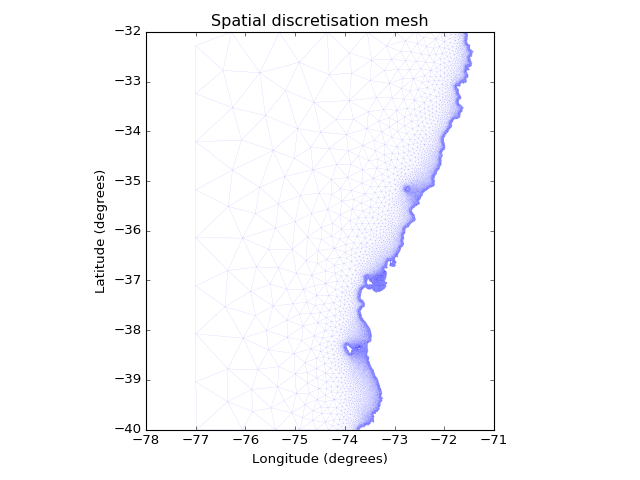

  Reading mesh file: /Users/asc/src/Shingle/test/Chile_Talcahuano/Chile_Talcahuano.msh
    Discretisation characteristics: 18008 nodes, 36013 elements


In [4]:
%matplotlib nbagg
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.triplot(mesh.GetTriangulation(), 'b-', linewidth=0.05)
plt.gca().set_aspect('equal')
plt.title('Spatial discretisation mesh')
plt.xlabel('Longitude (degrees)')
plt.ylabel('Latitude (degrees)')
plt.ylim([-40,-32])
plt.tight_layout()
plt.show()